### 统计学：检验心理学现象


背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。


(1) 我们的自变量是什么？因变量是什么？

自变量是文字与墨色是否一致（congruent、incongruent）;因变量是完成每个人完成每种“文字---颜色”测试的反应时间T。

(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

#### 假设
“文字---颜色”一致组测试的总体时间均值Tc,不一致组测试的总体时间均值Ti。零假设：Tc与Ti没有显著差异，即H0：Tc = Ti; 备择假设：Tc与Ti存在显著差异，即H1: Tc ≠ Ti。
#### 统计检验方法
由于数据集组别为2组，样本含量较小，每行的2个数据来自一个人，所以用配对样本T检验作为统计检验的方法。

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [1]:
# 在这里执行你的分析
import matplotlib.pyplot as plt
% matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
df = pd.read_csv('stroopdata.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [3]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


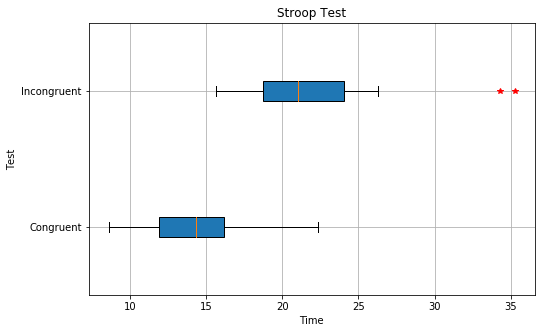

In [4]:
#绘制箱线图
plt.figure(figsize=(8,5))
plt.grid(True)
plt.boxplot(sym='r*', vert=False, patch_artist=True, x=df.values, labels=df.columns)
plt.xlabel('Time')
plt.ylabel('Test')
plt.title('Stroop Test');

根据描述性统计和箱线图显示，Congruent组的中心性测量值有：平均值14.0511，中位数14.3565；
Incongruent组的中心性测量值有：平均值为22.0159，中位数21.0175。Incongruent组有2个异常点，偏离中位数较远。Congruent组的可变性测量值有：标准差3.5594，四分位距4.3055；Incongruent组的可变性测量值有：标准差4.7971，四分位距5.3348。

(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

In [5]:
#把每个个体的测试结果转化成数组
y = np.array(df)
y

array([[ 12.079,  19.278],
       [ 16.791,  18.741],
       [  9.564,  21.214],
       [  8.63 ,  15.687],
       [ 14.669,  22.803],
       [ 12.238,  20.878],
       [ 14.692,  24.572],
       [  8.987,  17.394],
       [  9.401,  20.762],
       [ 14.48 ,  26.282],
       [ 22.328,  24.524],
       [ 15.298,  18.644],
       [ 15.073,  17.51 ],
       [ 16.929,  20.33 ],
       [ 18.2  ,  35.255],
       [ 12.13 ,  22.158],
       [ 18.495,  25.139],
       [ 10.639,  20.429],
       [ 11.344,  17.425],
       [ 12.369,  34.288],
       [ 12.944,  23.894],
       [ 14.233,  17.96 ],
       [ 19.71 ,  22.058],
       [ 16.004,  21.157]])

Text(0.5,1,'Stroop Test')

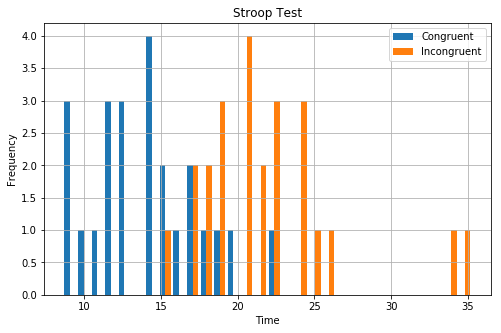

In [6]:
# 绘制直方图，查看Stroop测试分布情况
plt.figure(figsize=(8,5))
plt.hist(y, bins=30, label=['Congruent','Incongruent'])
plt.grid(True)
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.title('Stroop Test')

从直方图的分布情况来看，Congruent测试的时间主要分布在图表左侧，而Incongruent测试的时间主要分布在图表右侧，即一致任务所花的时间比不一致任务所花时间短。

(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

本次统计检验用T检验（配对样本）来计算P值,设定显著性水平α为0.05，置信水平为95%，自由度为n-1,是双尾检验，通过查询，t临界值为2.069。

In [7]:
# 配对样本T检验
stats.ttest_rel(df['Congruent'],df['Incongruent'])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

T检验的t值-8.0207，t值的绝对值大于t临界值2.069，且pvalue值为4.1030005857111781e-08，小于显著性水平α值0.05，因此拒绝零假设H0，即拒绝Tc = Ti的假设，接受备择假设H1，Congruent组测试的时间与Incongruent组测试的时间存在显著差异。

#### 结论
综合以上的Congruent、Incongruent两组数据的分布图情况以及T检验的结果，判断Stroop心理测试的Congruent组测试的时间与Incongruent组测试的时间，存在显著差异，且Incongruent组测试的时间更长，通过本此测试的数据集，推测文字的内容对颜色的判断有影响。